In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy


In [2]:
import datetime as dt

In [3]:
loan=pd.read_csv('c:/Users/LENOVO/My Documents/data sets/LTFS/train_c.csv')
sample=pd.read_csv('c:/Users/LENOVO/My Documents/data sets/LTFS/sample_submission.csv')
test=pd.read_csv('c:/Users/LENOVO/My Documents/data sets/LTFS/test.csv')

In [38]:
#loan['AVERAGE.ACCT.AGE'].str.extract('(\d)')

In [187]:
#splitting
sp=loan['AVERAGE.ACCT.AGE'].str.split('yrs',n=1,expand=True)
#calculating days in years
sp_yr=sp.iloc[:,0]
sp_yr=sp_yr.astype('int64')
sp_yr=sp_yr*365.25
sp_yr=sp_yr.astype('int64')
#calculating days in months
sp_mon=sp.iloc[:,1].str.split('mon',n=1,expand=True).iloc[:,0]
sp_mon=sp_mon.astype('int64')
sp_mon=sp_mon*30.5
sp_mon=sp_mon.astype('int64')
#summing
mod=sp_yr+sp_mon
#replacing
loan['AVERAGE.ACCT.AGE']=mod

In [188]:
#splitting
sp=loan['CREDIT.HISTORY.LENGTH'].str.split('yrs',n=1,expand=True)
#calculating days in years
sp_yr=sp.iloc[:,0]
sp_yr=sp_yr.astype('int64')
sp_yr=sp_yr*365.25
sp_yr=sp_yr.astype('int64')
#calculating days in months
sp_mon=sp.iloc[:,1].str.split('mon',n=1,expand=True).iloc[:,0]
sp_mon=sp_mon.astype('int64')
sp_mon=sp_mon*30.5
sp_mon=sp_mon.astype('int64')
#summing
mod=sp_yr+sp_mon
#replacing
loan['CREDIT.HISTORY.LENGTH']=mod

In [189]:
loan['Date.of.Birth']=pd.to_datetime(loan['Date.of.Birth'])
loan['DisbursalDate']=pd.to_datetime(loan['DisbursalDate'])
ch=loan['DisbursalDate']-loan['Date.of.Birth']
ch=ch/dt.timedelta(days=365)   
loan.insert(7,'Age',ch)
loan['Age']=abs(loan['Age'])

In [191]:
loan.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Age', 'Current_pincode_ID',
       'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [192]:
loan.drop(['UniqueID','Date.of.Birth','DisbursalDate','MobileNo_Avl_Flag'],axis=1,inplace=True)

In [11]:
def KNN(data,count=3):
    from sklearn.metrics.pairwise import euclidean_distances
    m=data.isnull().sum()
    mis=[]
    data1=data.copy()
    for i in range(0,data.shape[1]):
        if(m[i]>0):
            mis.append(data.columns[i]) 
        if(len(data.iloc[:,i].value_counts())>50 and data.dtypes[i]=="O"):
            data1.drop(data.columns[i],axis=1,inplace=True)
        if(len(data.iloc[:,i].value_counts())<2):
            data1.drop(data.columns[i],axis=1,inplace=True)
    data1.drop(mis,axis=1,inplace=True)  
    print('Number of columns removed for processing is',len(data.columns)-len(data1.columns))
    for i in range(0,data1.shape[1]):
        if(data1.dtypes[i]=='O'):
            data1.iloc[:,i]=data1.iloc[:,i].astype('category')
    data1=pd.get_dummies(data1,drop_first=True) 
    for i in range(data1.shape[1]):
        data1.iloc[:,i]=(data1.iloc[:,i]-min(data1.iloc[:,i]))/(max(data1.iloc[:,i])-min(data1.iloc[:,i]))  
    for i in mis:
        mi=data[data.loc[:,i].isnull()==True].index
        nu=data[data.loc[:,i].isnull()==False].index
        ary = euclidean_distances(data1.loc[mi,:], data1.loc[nu,:])
        ary=pd.DataFrame(ary)
        ary.index=mi
        ary.columns=nu
        n=0
        if(data.dtypes[data.columns.get_loc(i)]=='O'):
            for j in mi:
                cot=ary.loc[j,:].nsmallest(count)
                cot=cot.index
                val=data.loc[cot,i]
                val=val.mode()
                val=pd.DataFrame(val)
                val=val.iloc[0,0]
                data.loc[j,i]=val
        else:
            for j in mi:
                cot=ary.loc[j,:].nsmallest(count)
                cot=cot.index
                val=data.loc[cot,i]   
                val=val.mean()
                data.loc[j,i]=val
    return(data)  

In [195]:
data=[]
data=pd.DataFrame(data)
for i in range(0,230000,10000):
    print(i/10000)
    data1=KNN(loan.iloc[i:i+10000,:],3)
    data=pd.concat([data,data1],axis=0)

0.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


4.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


5.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


6.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


7.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


8.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


9.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


10.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


11.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


12.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


13.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


14.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


15.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


16.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


17.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


18.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


19.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.0
Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [196]:
data1=KNN(loan.iloc[230000:233154],3)

Number of columns removed for processing is 2


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [197]:
data=pd.concat([data,data1],axis=0)

In [198]:
data.shape

(233154, 39)

In [23]:
data.to_csv('loan')

In [ ]:
loan=data

In [3]:
loan.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Age', 'Current_pincode_ID', 'State_ID',
       'Employee_code_ID', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'Employment.Type_Self employed',
       'PERFORM_CNS.SCORE.DESCRIPTION_B-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_D-Very Low Risk',
       'PERFOR

In [20]:
def to_dummy(data):
    ty=data.dtypes
    cat=[]
    for i in range(0,len(data.columns)):
        if(ty[i]=='object'):
            data.iloc[:,i]=data.iloc[:,i].astype('category')
    data=pd.get_dummies(data,drop_first=True)
    return(data)

In [19]:
loan=to_dummy(loan)

In [4]:
#splitting
sp=test['AVERAGE.ACCT.AGE'].str.split('yrs',n=1,expand=True)
#calculating days in years
sp_yr=sp.iloc[:,0]
sp_yr=sp_yr.astype('int64')
sp_yr=sp_yr*365.25
sp_yr=sp_yr.astype('int64')
#calculating days in months
sp_mon=sp.iloc[:,1].str.split('mon',n=1,expand=True).iloc[:,0]
sp_mon=sp_mon.astype('int64')
sp_mon=sp_mon*30.5
sp_mon=sp_mon.astype('int64')
#summing
mod=sp_yr+sp_mon
#replacing
test['AVERAGE.ACCT.AGE']=mod

In [5]:
#splitting
sp=test['CREDIT.HISTORY.LENGTH'].str.split('yrs',n=1,expand=True)
#calculating days in years
sp_yr=sp.iloc[:,0]
sp_yr=sp_yr.astype('int64')
sp_yr=sp_yr*365.25
sp_yr=sp_yr.astype('int64')
#calculating days in months
sp_mon=sp.iloc[:,1].str.split('mon',n=1,expand=True).iloc[:,0]
sp_mon=sp_mon.astype('int64')
sp_mon=sp_mon*30.5
sp_mon=sp_mon.astype('int64')
#summing
mod=sp_yr+sp_mon
#replacing
test['CREDIT.HISTORY.LENGTH']=mod

In [7]:
test['Date.of.Birth']=pd.to_datetime(test['Date.of.Birth'])
test['DisbursalDate']=pd.to_datetime(test['DisbursalDate'])
ch=test['DisbursalDate']-test['Date.of.Birth']
ch=ch/dt.timedelta(days=365)   
test.insert(7,'Age',ch)
test['Age']=abs(test['Age'])

In [8]:
test.drop(['UniqueID','Date.of.Birth','DisbursalDate','MobileNo_Avl_Flag'],axis=1,inplace=True)

In [9]:
test.shape

(112392, 37)

In [12]:
data=[]
data=pd.DataFrame(data)
for i in range(0,110000,10000):
    print(i/10000)
    data1=KNN(test.iloc[i:i+10000,:],3)
    data=pd.concat([data,data1],axis=0)

0.0
Number of columns removed for processing is 1


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1.0
Number of columns removed for processing is 1


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2.0
Number of columns removed for processing is 1


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3.0
Number of columns removed for processing is 1


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


4.0
Number of columns removed for processing is 1


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


5.0
Number of columns removed for processing is 1


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


6.0
Number of columns removed for processing is 1


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


7.0
Number of columns removed for processing is 1


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


8.0
Number of columns removed for processing is 1


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


9.0
Number of columns removed for processing is 1


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


10.0
Number of columns removed for processing is 1


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
data1=KNN(test.iloc[110000:112392],3)

Number of columns removed for processing is 1


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
data=pd.concat([data,data1],axis=0)

In [15]:
data.shape

(112392, 37)

In [16]:
test=data

In [18]:
test.to_csv('test_c')

In [21]:
test=to_dummy(test)

In [22]:
test.shape

(112392, 54)

In [25]:
x.shape

(10000, 55)

In [40]:
# splitting data
y=loan.loc[:,'loan_default']
x=loan.iloc[:,:]
x=x.drop(['loan_default'],axis=1)

In [36]:
def same_col(train,test):
    train_c=train.columns
    test_c=test.columns
    for i in range(0,train.shape[1]):
        flag=0
        for j in range(0,test.shape[1]):
            if(train_c[i]==test_c[j]):
                flag=1
        if(flag==0):
            train=train.drop([train_c[i]],axis=1)
            print(train_c[i])
    return(train)  

In [41]:
x=same_col(x,test)

PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found


TEST DATA confusion matrix 

        Actual 0  Actual 1
pred 0      5575       473
pred 1     40075     12166


TRAIN DATA confusion matrix 

        Actual 0  Actual 1
pred 0     17567       722
pred 1    119326     37250


,test,train
Accuracy,0.304363,0.313482
Precision,0.962576,0.980986
Recall,0.232882,0.237904
F1-Score,0.375031,0.382939
AUC,0.660085,0.720486


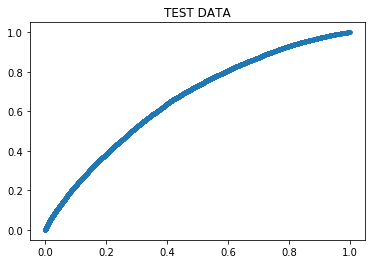

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1_score=[]
test_auc=[]
train_accuracy=[]
train_precision=[]
train_recall=[]
train_f1_score=[]
train_auc=[]

for i in range(0,1):
    #sampling
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)
    #building model                                                       #adjusting parameters to reduce overfitting
    model=XGBClassifier(max_depth=7,learning_rate=0.1,n_estimators=100,silent=True,gamma=7,subsample=1,colsample_bytree=1,colsample_bylevel=0.8,)
    model.fit(x_train,y_train)
    #predicting results for test
    #pred=model.predict(x_test)
    pred_p=model.predict_proba(x_test)
    pred_p=pred_p[:,1]
    pred=(pred_p>0.1).astype('int64')
    #creating confision matrix
    cm=confusion_matrix(pred,y_test, labels=None, sample_weight=None)
    #calculating the performance paramters for test data
    test_accuracy.append((cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,0]+cm[0,0]+cm[1,1]))
    test_precision.append(cm[1,1]/(cm[1,1]+cm[0,1]))
    test_recall.append(cm[1,1]/(cm[1,1]+cm[1,0]))
    test_f1_score.append((2*test_precision[i]*test_recall[i])/(test_precision[i]+test_recall[i]))
    test_auc.append(roc_auc_score(y_test, pred_p))
    fpr, tpr, thresholds = roc_curve(y_test, pred_p)
    #plt.title('TEST DATA')
    #p=plt.plot(fpr, tpr, marker='.')
    #predicting results for train
    #pred=model.predict(x_train)
    pred_p=model.predict_proba(x_train)
    pred_p=pred_p[:,1]
    pred=(pred_p>0.1).astype('int64')
    #creating confision matrix
    cm1=confusion_matrix(pred,y_train, labels=None, sample_weight=None)
    #calculating the performance paramters for train data
    train_accuracy.append((cm1[0,0]+cm1[1,1])/(cm1[0,1]+cm1[1,0]+cm1[0,0]+cm1[1,1]))
    train_precision.append(cm1[1,1]/(cm1[1,1]+cm1[0,1]))
    train_recall.append(cm1[1,1]/(cm1[1,1]+cm1[1,0]))
    train_f1_score.append((2*train_precision[i]*train_recall[i])/(train_precision[i]+train_recall[i]))
    train_auc.append(roc_auc_score(y_train, pred_p))
    #fpr, tpr, thresholds = roc_curve(y_train, pred_p)
    plt.title('TEST DATA')
    plt.plot(fpr, tpr, marker='.')
    
test_p=[np.mean(test_accuracy),np.mean(test_precision),np.mean(test_recall),np.mean(test_f1_score),np.mean(test_auc)]
train_p=[np.mean(train_accuracy),np.mean(train_precision),np.mean(train_recall),np.mean(train_f1_score),np.mean(train_auc)]

test_p=pd.DataFrame(test_p)
train_p=pd.DataFrame(train_p)
result=pd.concat([test_p,train_p],axis=1)
result.columns=['test','train']
result.index=['Accuracy','Precision','Recall','F1-Score','AUC']
cm=pd.DataFrame(cm)
cm.columns=['Actual 0','Actual 1']
cm.index=['pred 0','pred 1']
cm1=pd.DataFrame(cm1)
cm1.columns=['Actual 0','Actual 1']
cm1.index=['pred 0','pred 1']
print('TEST DATA confusion matrix \n')
print(cm)
print('\n')
print('TRAIN DATA confusion matrix \n')
print(cm1)
result

   